<a href="https://colab.research.google.com/github/heliocarrara/Python-IA/blob/main/redesneurais_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('emprego.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
x = df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
y = df['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
modelo = MLPClassifier(
    hidden_layer_sizes=(10, 5, 3, 2),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.0001,
    max_iter=2000,
    tol=1e-5,
    shuffle=True,
    random_state=20,
    validation_fraction=0.2,
    verbose=True)

In [ ]:
modelo.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Iteration 9400, loss = 0.32422456
Iteration 9401, loss = 0.32421498
Iteration 9402, loss = 0.32419188
Iteration 9403, loss = 0.32418216
Iteration 9404, loss = 0.32416810
Iteration 9405, loss = 0.32415435
Iteration 9406, loss = 0.32414352
Iteration 9407, loss = 0.32414091
Iteration 9408, loss = 0.32411780
Iteration 9409, loss = 0.32411119
Iteration 9410, loss = 0.32410268
Iteration 9411, loss = 0.32407642
Iteration 9412, loss = 0.32407071
Iteration 9413, loss = 0.32405163
Iteration 9414, loss = 0.32403784
Iteration 9415, loss = 0.32402341
Iteration 9416, loss = 0.32401687
Iteration 9417, loss = 0.32399272
Iteration 9418, loss = 0.32397966
Iteration 9419, loss = 0.32398623
Iteration 9420, loss = 0.32396106
Iteration 9421, loss = 0.32394001
Iteration 9422, loss = 0.32394564
Iteration 9423, loss = 0.32393239
Iteration 9424, loss = 0.32390015
Iteration 9425, loss = 0.32390820
Iteration 9426, loss = 0.32388616
Iteration 9427, loss = 0.323873

MLPClassifier(hidden_layer_sizes=(10, 5, 3, 2), learning_rate_init=0.0001,
              max_iter=20000, random_state=20, tol=1e-05,
              validation_fraction=0.2, verbose=True)

Text(0, 0.5, 'Loss')

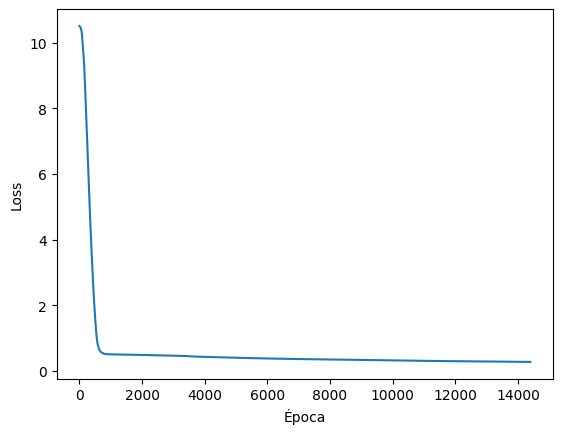

In [ ]:
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

In [ ]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print(confusion_matrix(y_train,predicao))
print(classification_report(y_train,predicao))

Dados de treinamento
[[40  4]
 [ 9 97]]
              precision    recall  f1-score   support

  Not Placed       0.82      0.91      0.86        44
      Placed       0.96      0.92      0.94       106

    accuracy                           0.91       150
   macro avg       0.89      0.91      0.90       150
weighted avg       0.92      0.91      0.91       150



In [ ]:
print('Dados de teste')

predicao = modelo.predict(X_test)

print(confusion_matrix(y_test,predicao))
print(classification_report(y_test,predicao))

Dados de teste
[[17  6]
 [ 7 35]]
              precision    recall  f1-score   support

  Not Placed       0.71      0.74      0.72        23
      Placed       0.85      0.83      0.84        42

    accuracy                           0.80        65
   macro avg       0.78      0.79      0.78        65
weighted avg       0.80      0.80      0.80        65

